# K Nearest Neighbors a.k.a. KNN

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# sns.set()

## Get the Data

Set index_col=0 to use the first column as the index.

In [2]:
data = pd.read_csv('Classified Data.csv',index_col=0)

In [3]:
data.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


## Standardization

### Standardization is the process by which we convert the data into standard normal distribution

- standardization = (xi - mean)/std
- normalization = (xi - xmin)/ (xmax - xmin)

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
input_x = data.drop( 'TARGET CLASS' ,axis = 1)

In [97]:
scaler = StandardScaler()
scaler.fit(input_x)

StandardScaler()

In [107]:
data_standardized = scaler.transform(input_x)
data_standardized
data.shape

(1000, 11)

In [75]:
data_standardized

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [76]:
cols  =  data.columns.to_list()
cols.pop(-1)
standardized_df = pd.DataFrame(data=data_standardized, columns=cols) 
standardized_df['TARGET CLASS'] = data['TARGET CLASS']
standardized_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314,1
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759,0
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850,0
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987,1
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602,1
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448,0
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597,1
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670,1


<AxesSubplot:ylabel='Count'>

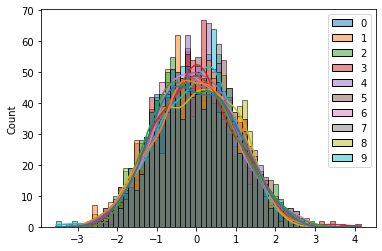

In [79]:
sns.histplot(data_standardized,kde=True)

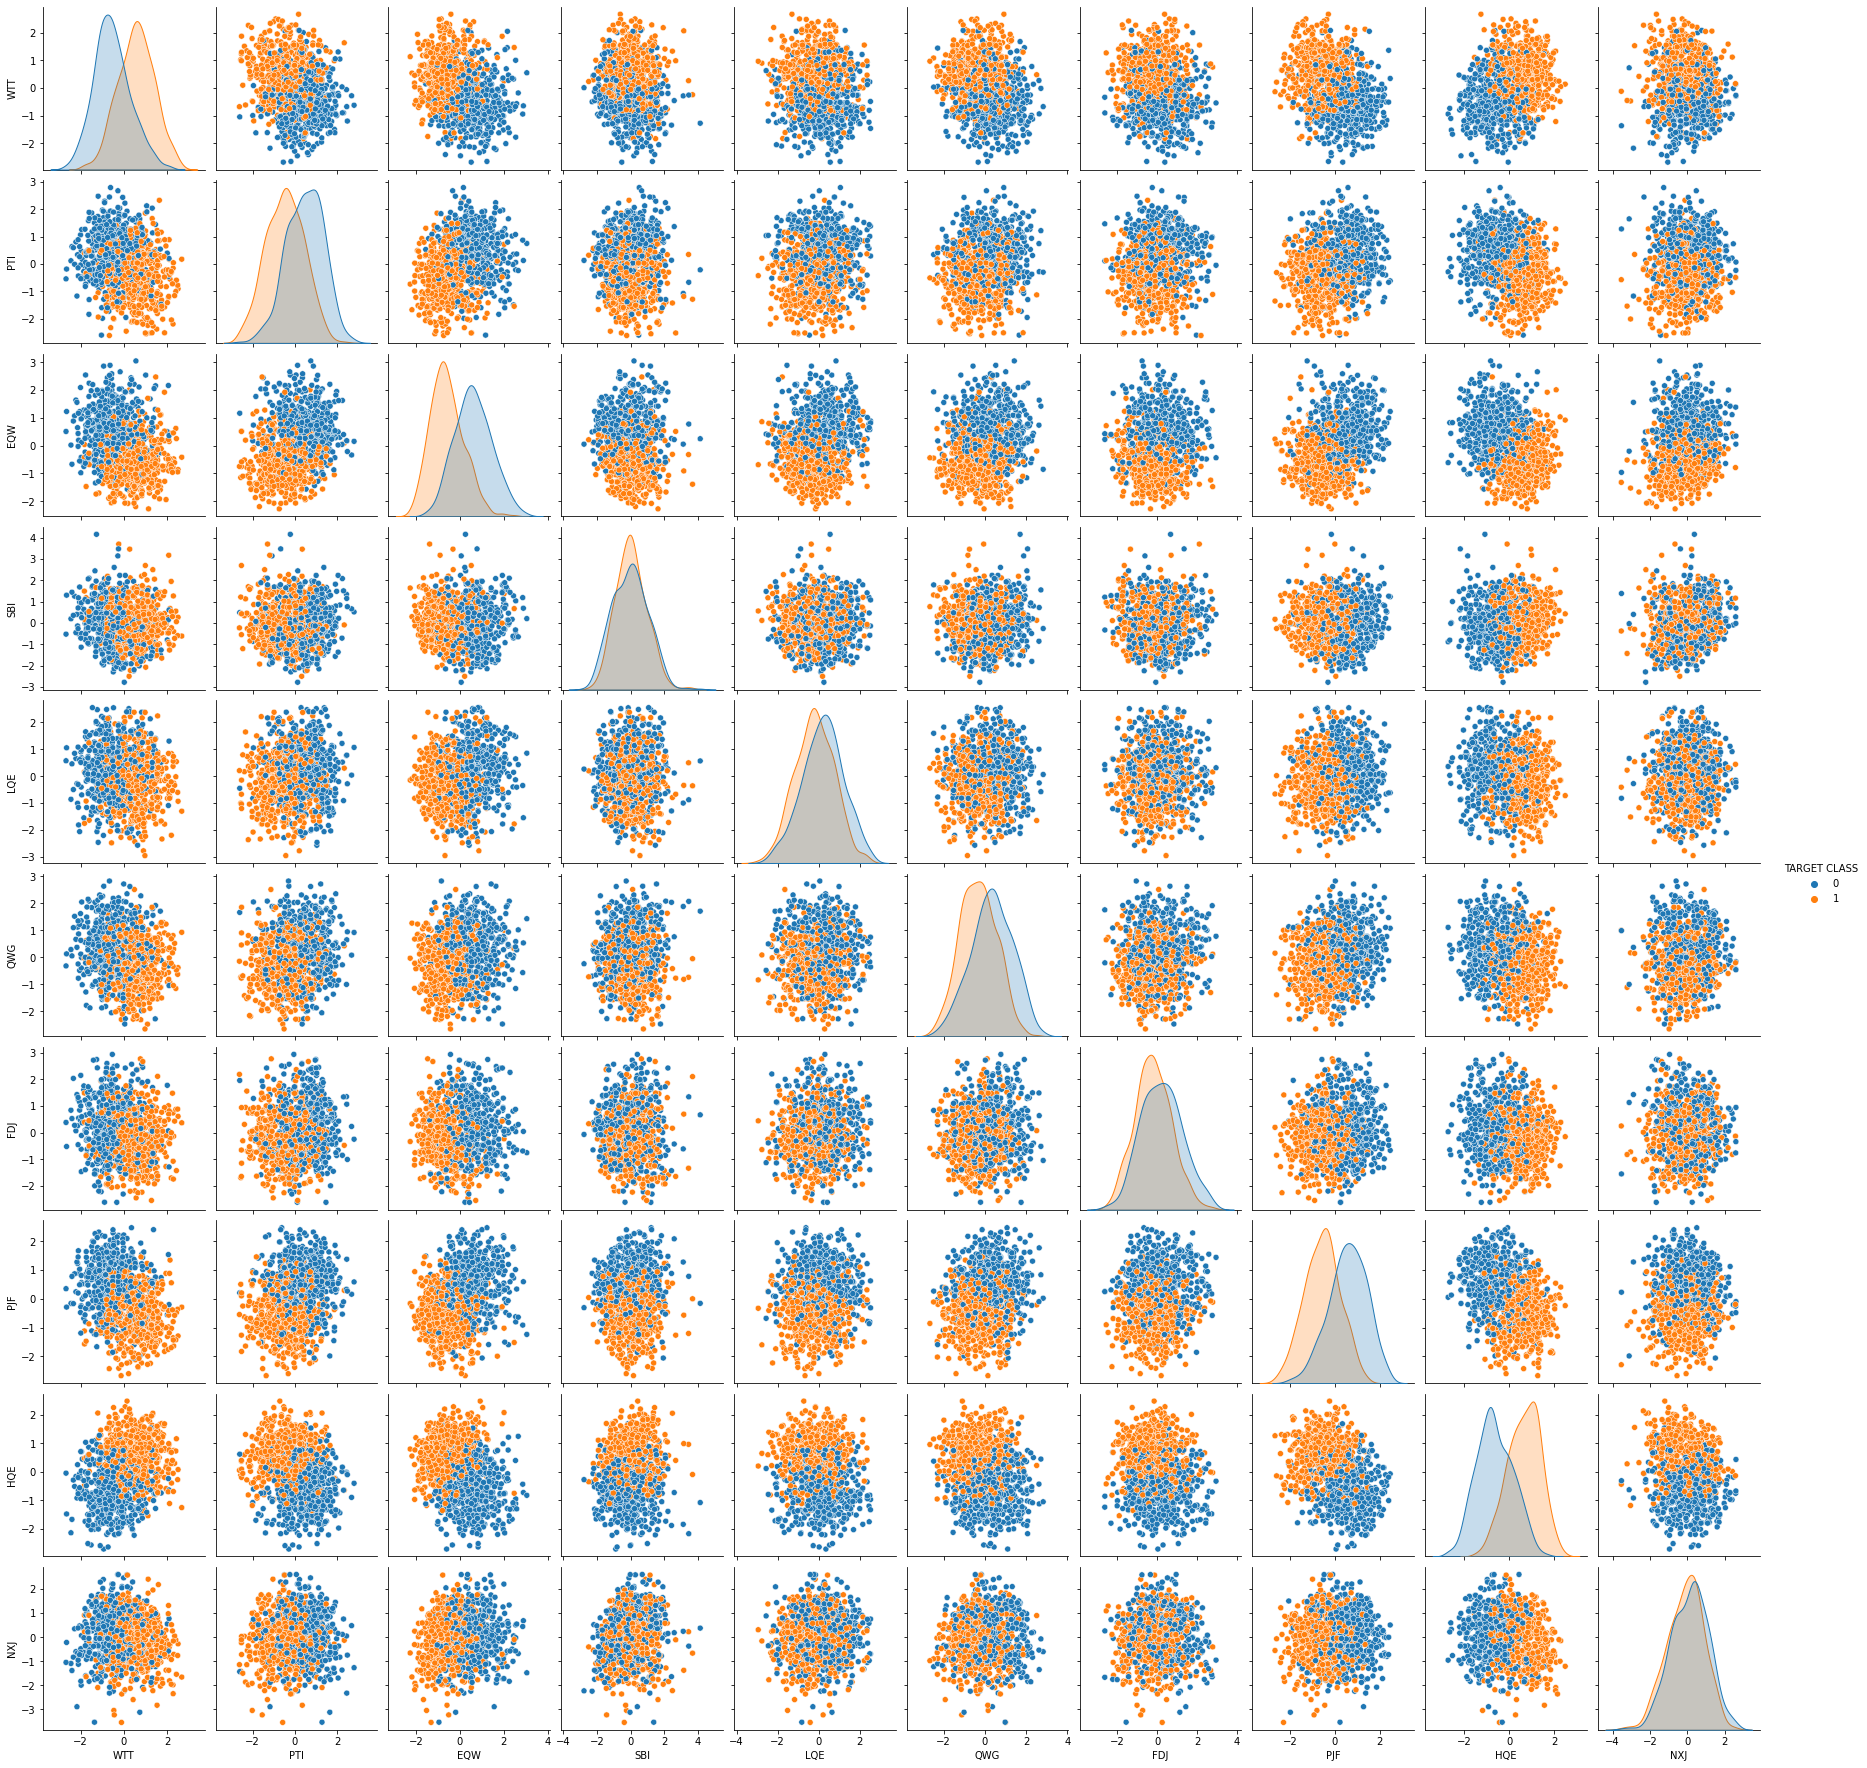

In [78]:
sns.pairplot(standardized_df, hue='TARGET CLASS')

<AxesSubplot:>

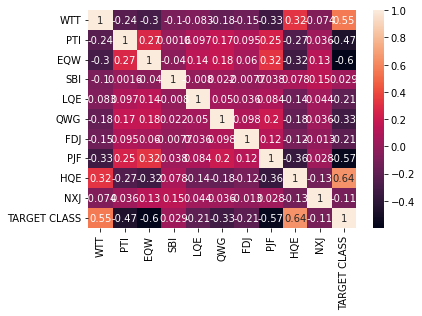

In [37]:
sns.heatmap(standardized_df.corr(),annot=True)

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [40]:
X = data_standardized
Y = data['TARGET CLASS']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)


## Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1) # k =1

In [16]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
Y_pred = knn.predict(X_test)
Y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], d

## Predictions and Evaluations

Let's evaluate our KNN model!

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [19]:
confusion_matrix(Y_test,Y_pred) # confusion matrix for k = 1

array([[131,  19],
       [  8, 142]], dtype=int64)

In [20]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [104]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,standardized_df.drop('TARGET CLASS',axis=1),standardized_df['TARGET CLASS'])
    accuracy_rate.append(score.mean())
accuracy_rate

[0.913,
 0.9129999999999999,
 0.9259999999999999,
 0.933,
 0.924,
 0.924,
 0.933,
 0.9369999999999999,
 0.93,
 0.932,
 0.9360000000000002,
 0.933,
 0.9369999999999999,
 0.9359999999999999,
 0.9339999999999999,
 0.9349999999999999,
 0.93,
 0.9339999999999999,
 0.933,
 0.9359999999999999,
 0.932,
 0.9349999999999999,
 0.9359999999999999,
 0.9410000000000001,
 0.9389999999999998,
 0.9390000000000001,
 0.9400000000000001,
 0.943,
 0.9380000000000001,
 0.9390000000000001,
 0.9380000000000001,
 0.9390000000000001,
 0.9390000000000001,
 0.9410000000000001,
 0.937,
 0.943,
 0.9400000000000001,
 0.942,
 0.9400000000000001]

In [102]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,standardized_df.drop('TARGET CLASS',axis=1), standardized_df['TARGET CLASS'])
    error_rate.append(1 - np.mean(score))

error_rate

[0.08699999999999997,
 0.08700000000000008,
 0.07400000000000007,
 0.06699999999999995,
 0.07599999999999996,
 0.07599999999999996,
 0.06699999999999995,
 0.06300000000000006,
 0.06999999999999995,
 0.06799999999999995,
 0.06399999999999983,
 0.06699999999999995,
 0.06300000000000006,
 0.06400000000000006,
 0.06600000000000006,
 0.06500000000000006,
 0.06999999999999995,
 0.06600000000000006,
 0.06699999999999995,
 0.06400000000000006,
 0.06799999999999995,
 0.06500000000000006,
 0.06400000000000006,
 0.05899999999999994,
 0.061000000000000165,
 0.06099999999999994,
 0.05999999999999994,
 0.05700000000000005,
 0.061999999999999944,
 0.06099999999999994,
 0.061999999999999944,
 0.06099999999999994,
 0.06099999999999994,
 0.05899999999999994,
 0.06299999999999994,
 0.05700000000000005,
 0.05999999999999994,
 0.05800000000000005,
 0.05999999999999994]

Text(0.5, 1.0, 'Error Rate Graph')

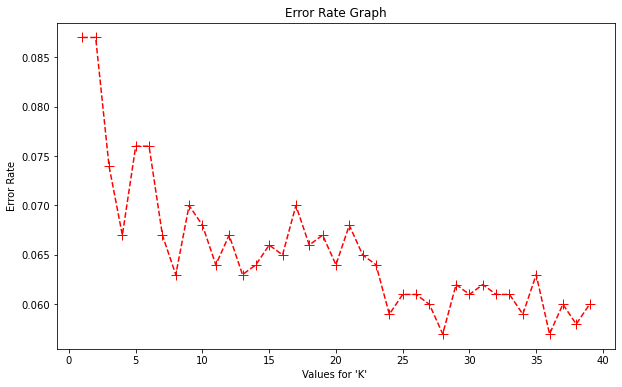

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='red', linestyle='dashed', marker='+',markerfacecolor='green', markersize=10)
plt.xlabel("Values for 'K' ")
plt.ylabel("Error Rate")
plt.title("Error Rate Graph")

Text(0.5, 1.0, 'Accuracy Rate Graph')

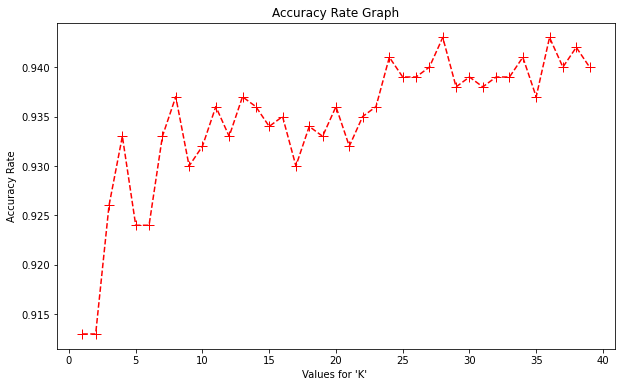

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='red', linestyle='dashed', marker='+',markerfacecolor='green', markersize=10)
plt.xlabel("Values for 'K' ")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy Rate Graph")

In [54]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=1


[[131  19]
 [  8 142]]


              precision    recall  f1-score   support

           0       0.94      0.87      0.91       150
           1       0.88      0.95      0.91       150

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [55]:
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(Y_test,Y_pred))
print('\n')
print(classification_report(Y_test,Y_pred))

WITH K=23


[[137  13]
 [  2 148]]


              precision    recall  f1-score   support

           0       0.99      0.91      0.95       150
           1       0.92      0.99      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [56]:
from sklearn.metrics import roc_curve,auc

In [57]:
fpr, tpr, threshold = roc_curve(Y_test,Y_pred)

In [58]:
roc_auc = auc(fpr, tpr)

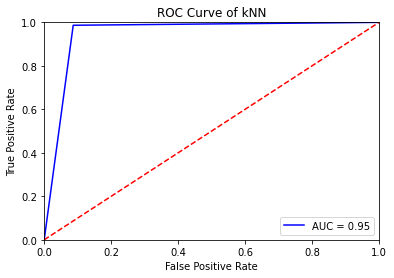

In [59]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [81]:
knn_gs = KNeighborsClassifier()

In [87]:

param_grid = {'n_neighbors' : np.arange(1,40), 'p':[2]}
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39]),
 'p': [2]}

In [88]:
gscv_model = GridSearchCV(knn_gs,param_grid, cv = 10) # CV : if extreamly high then model will overfit 
gscv_model.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'p': [2]})

In [89]:
gscv_model.best_estimator_

KNeighborsClassifier(n_neighbors=26)

In [91]:
randomcv_model = RandomizedSearchCV(knn_gs,param_grid, cv = 10) # CV : if extreamly high then model will overfit 
randomcv_model.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                                        'p': [2]})

In [92]:
randomcv_model.best_estimator_

KNeighborsClassifier(n_neighbors=28)